# Python Kullanarak Zaman Serisi Analizi

## Prophet

'prophet' bir açık kaynaklı bir zaman serisi analizi kütüphanesidir. Facebook tarafından geliştirilmiştir. Bu kütüphane, zaman serisi verilerinin analizini yapmak ve gelecekteki değerleri tahmin etmek için kullanılabilir.

'prophet' kütüphanesi, ARIMA (Otomatik Regresyon Entegrasyonlu Hareketli Ortalama) ve diğer benzeri tekniklere kıyasla daha az teknik bilgi gerektirir ve bu nedenle zaman serisi analizi yapmak isteyen birçok insan için kolayca kullanılabilir.

## İhtiyacımız Olan Kütüphaneler

- pandas
- matplotlib
- scikit-learn
- fbprophet
- plotly 

Bu kütüpaheneleri başların !pip install ... komutu getirerek kurabilirsiniz.


## Kütüphanelerin İçeri Aktarılması

In [94]:
import pandas as pd
from matplotlib import pyplot
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error


## Verinin İçe Aktarılması

Bu çalışma için sıcaklık veri seti kullanılmıştır.

In [95]:
# veri setinin içeri aktarılması
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-mean-temp.csv' 
df = pd.read_csv(path, header=0)

print(df.shape) #veri seti 144 satır, 2 sütundan oluşuyor
print(df.head()) 


(240, 2)
     Month  Temperature
0  1920-01         40.6
1  1920-02         40.8
2  1920-03         44.4
3  1920-04         46.7
4  1920-05         54.1


Modelin doğru çalışması için veri setinde herhangi eksik bir değer var mı kontrol ediyoruz.

In [96]:
df.isnull().sum() 

Month          0
Temperature    0
dtype: int64

## Verinin Görselleştirilmesi

Zaman serisi, verilerinizdeki eğilimleri, sezonluk değişimleri, dalgalanmaları, düzensizlikleri ve diğer özellikleri belirlemenizi sağlar. Bu şekilde, verilerinizi daha iyi anlamanızı ve gelecekteki davranışları daha doğru bir şekilde tahmin etmenize yardımcı olur.

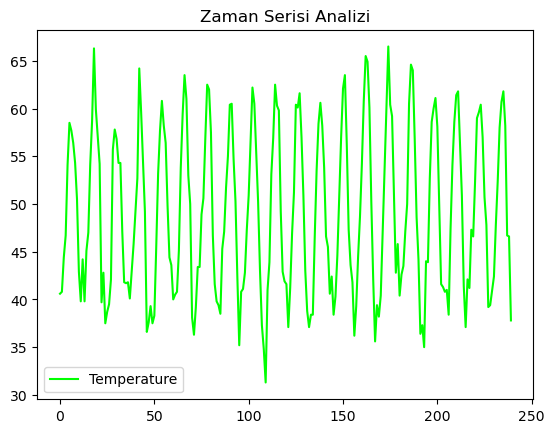

In [108]:
#matplotlib kullanarak zaman serisi çiziyoruz
df.plot(color='lime')
# grafiğin başlığını belirler.
plt.title("Zaman Serisi Analizi")
pyplot.show()

## Sıcaklık İçin Dağılım Grafiği

Bir seaborn dağılım grafiği (distribution plot) kullanarak "Sıcaklık" sütunundaki verilerin dağılımını görselleştirmeyi amaçlanmıştır.

C:\Users\ceren\AppData\Local\Temp\ipykernel_14912\1156658699.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df["Temperature"], color = 'r')


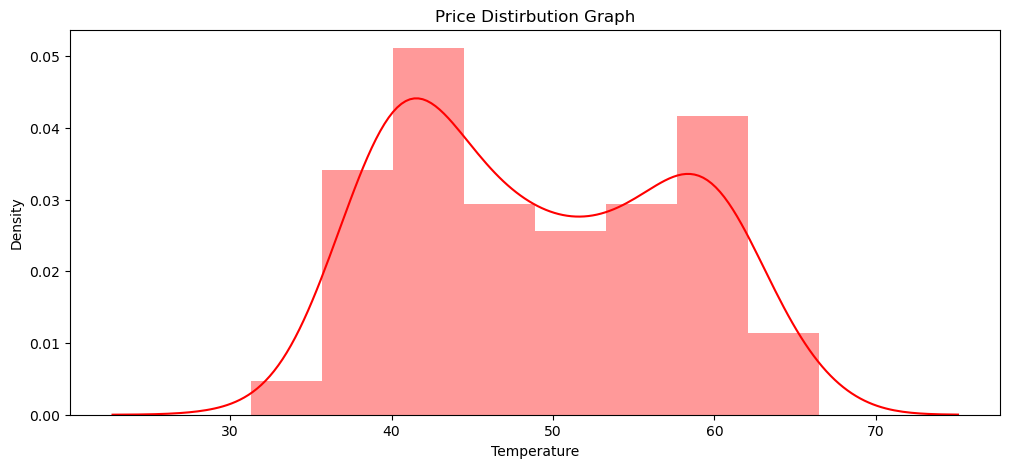

In [110]:
#12 birim genişlikte ve 5 birim yükseklikte bir grafik oluşturur. 
#Bu, grafik boyutunu belirlemek için kullanılan bir matplotlib fonksiyonudur.
plt.figure(figsize=(12,5))

# grafiğin başlığını belirler.
plt.title("Price Distirbution Graph")

#Seaborn kütüphanesinin distplot() fonksiyonunu kullanarak dağılım grafiğini oluşturur. 
#df["Temperature"] ifadesi, df veri çerçevesindeki "Temperature" sütununu seçer. 
#color = 'r' ifadesi ise grafiğin rengini kırmızı olarak ayarlar. 
ax = sns.distplot(df["Temperature"], color = 'r')


## Veri dönüştürme

Modeli oluşturabilmemiz için veri tiplerimizin belli bir tipte olması gerekmektedir. Öncelikle mevcut veri setimizin veri tiplerini kontrol edelim.

In [111]:
print(df.dtypes)


Month           object
Temperature    float64
dtype: object


Yukarıda Month'un object veri tipinde olduğunu görüyoruz. **"Object"** veri tipi, Python'da farklı türlerdeki verileri depolamak için kullanılan bir genel veri tipidir. "datetime" veri tipi, Python'da tarih ve saat verilerini tutmak için kullanılan bir veri tipidir.  Month bizim **'datetime'** ımızdır. Bu yüzden modelin doğru çalışabilmesi için bir veri dönüşümü yapmamız gerekmektedir.

Ayrıca prophet 'ds' ve 'y' isimli iki sütun istemektedir. Bu yüzden sütun izimlerimize buna uygun olarak değiştireceğiz

In [112]:
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

In [113]:
print(df.dtypes) #datetime veri tipi dönüşümü

ds    datetime64[ns]
y            float64
dtype: object


## Modelin Oluşturulması

Prophet'i tahmin için kullanmak için, önce bir Prophet() nesnesi tanımlanır ve yapılandırılır, ardından fit() işlevi çağrılarak ve veriler geçirilerek veri kümesine sığdırılır.

Model çoğu şeyi otomatik olarak çözmek için çalışacaktır.

- İlk olarak, **"Prophet"** sınıfından bir nesne oluşturulur ve bu nesne **"model"** adlı değişkene atanır.
- Daha sonra, oluşturulan model nesnesi **"fit()"** yöntemi kullanılarak veri setine uyarlanır ve model eğitilir.

In [114]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


## Örnek İçi Tahmin

**#1** İlk olarak, bir boş liste oluşturulur ve gelecekte tahmin yapmak için kullanılacak tarihler, yani "ds" sütunu, bu listeye eklenir. Bu tarihler, ay ve yıl bilgisini içeren bir dize olarak belirtilir.

**#2** Ardından, bu liste "pandas" veri çerçevesine dönüştürülür ve "ds" sütununun adı ayarlanır.

**#3**"ds" sütunu "pandas" "to_datetime()" yöntemi kullanılarak datetime veri tipine dönüştürülür.

**#4** Son olarak, "Prophet" modeli kullanılarak, belirtilen gelecekteki tarihler için tahminler yapılır.

In [115]:
#1
future = list()

for i in range(1, 13):
    date = '1940-%02d' % i
    future.append([date])
#2    
future = pd.DataFrame(future)
future.columns = ['ds']
#3
future['ds']= pd.to_datetime(future['ds'])
#4
forecast = model.predict(future)

In [116]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1940-01-01,50.004900,37.992342,43.454608,50.004900,50.004900,-9.104503,-9.104503,-9.104503,-9.104503,-9.104503,-9.104503,0.0,0.0,0.0,40.900397
1,1940-02-01,50.012664,37.001873,42.850144,50.012608,50.012665,-9.972184,-9.972184,-9.972184,-9.972184,-9.972184,-9.972184,0.0,0.0,0.0,40.040480
2,1940-03-01,50.019927,40.121455,45.547329,50.019596,50.020221,-7.057194,-7.057194,-7.057194,-7.057194,-7.057194,-7.057194,0.0,0.0,0.0,42.962733
3,1940-04-01,50.027692,44.140202,49.434625,50.026940,50.028316,-3.217358,-3.217358,-3.217358,-3.217358,-3.217358,-3.217358,0.0,0.0,0.0,46.810333
4,1940-05-01,50.035205,51.400651,56.933243,50.033990,50.036272,4.046881,4.046881,4.046881,4.046881,4.046881,4.046881,0.0,0.0,0.0,54.082086
5,1940-06-01,50.042970,56.637491,62.105863,50.041175,50.044629,9.171531,9.171531,9.171531,9.171531,9.171531,9.171531,0.0,0.0,0.0,59.214500
6,1940-07-01,50.050483,59.446616,65.120659,50.048059,50.052763,12.291614,12.291614,12.291614,12.291614,12.291614,12.291614,0.0,0.0,0.0,62.342098
7,1940-08-01,50.058248,58.110510,63.604309,50.055264,50.061074,10.945577,10.945577,10.945577,10.945577,10.945577,10.945577,0.0,0.0,0.0,61.003825
8,1940-09-01,50.066012,54.358644,59.866867,50.062334,50.069659,7.130056,7.130056,7.130056,7.130056,7.130056,7.130056,0.0,0.0,0.0,57.196068
9,1940-10-01,50.073526,48.097935,53.581476,50.069244,50.077955,0.601318,0.601318,0.601318,0.601318,0.601318,0.601318,0.0,0.0,0.0,50.674843


En önemli sütunlar:

- tahmin tarih saat **('ds')**
- tahmin değeri **('yhat')**
- tahmin edilen değerin üzerinde alt ve üst sınırları **('yhat_lower' ve 'yhat_upper')**

In [117]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds       yhat  yhat_lower  yhat_upper
0 1940-01-01  40.900397   37.992342   43.454608
1 1940-02-01  40.040480   37.001873   42.850144
2 1940-03-01  42.962733   40.121455   45.547329
3 1940-04-01  46.810333   44.140202   49.434625
4 1940-05-01  54.082086   51.400651   56.933243


## Tahminlerin Çizdirilmesi

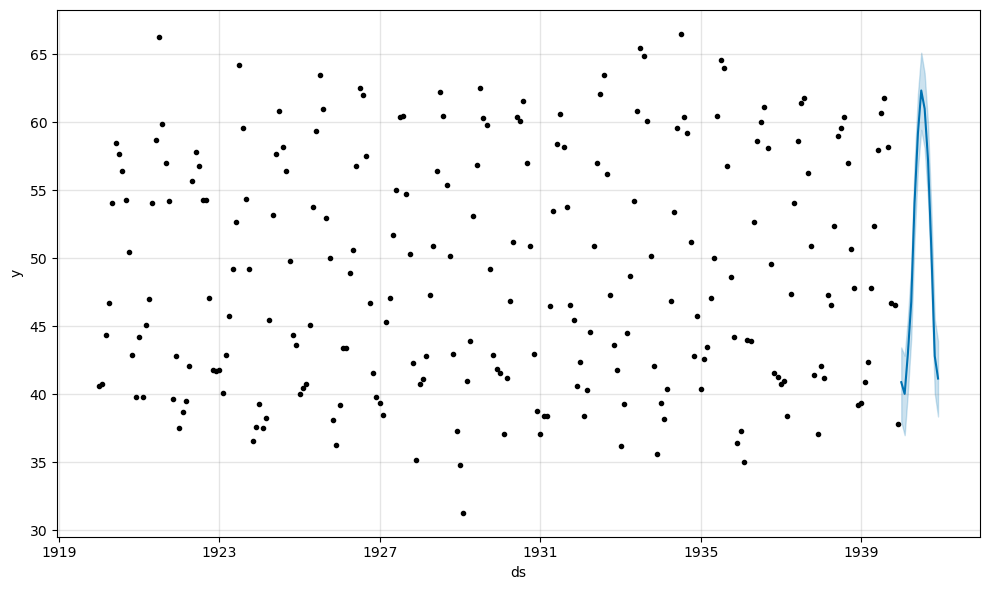

In [124]:
model.plot(forecast)
pyplot.show()

## Modelin Test Edilmesi

Bu bölümde veri setimizde bulunan son 1 yıllık kısmı veri setimizin içerisinden çıkartarak geri kalan verilerle tahmin etme işlemi yapıyoruz. Bunun sonucunda gerçek veriler ile tahmin ettiğimiz verileri karşılaştırarak model performansımızı ölçebiliriz.

In [125]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-mean-temp.csv'
df = pd.read_csv(path, header=0)

df.columns = ['ds', 'y']

"df" üzerinde işlem yaparak son 12 satırı (aynı zamanda son 12 aya karşılık gelen satırlar) kaldırır ve geri kalan verileri içeren bir "train" veri seti oluşturur.
- **"df.index[-12:]"** ifadesi, veri setindeki son 12 gözlemi (son 12 ayı) belirler. Daha sonra, "df.drop()" yöntemi bu indeksleri kullanarak son 12 gözlemi kaldırır ve geri kalan gözlemleri içeren "train" veri setini oluşturur.
- Oluşturulan "train" veri setinin son 5 gözlemini (satırlarını) görüntüler.

In [126]:
train = df.drop(df.index[-12:])
print(train.tail())

          ds     y
223  1938-08  60.4
224  1938-09  57.0
225  1938-10  50.7
226  1938-11  47.8
227  1938-12  39.2


Burada 1960 yılını biz tahmin etmeye çalışacağız:

In [76]:
model = Prophet()
model.fit(train) 

future = list()
for i in range(1, 13):
    date = '1939-%02d' % i
    future.append([date])
    
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])


forecast = model.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


- **'y_true'** değişkeni, gerçek değerlerin son 12 ayını içeren bir NumPy dizisidir. Burada, df['y'] ile y sütunundaki tüm değerler seçilir ve son 12 ayın, yani son 1 yılın verileri alınır. .values metodu kullanılarak bu değerler bir NumPy dizisine dönüştürülür.

- **'y_pred'** değişkeni, forecast değişkeninden gelen tahmin edilen değerleri içeren bir NumPy dizisidir. forecast değişkeni, Prophet kütüphanesi tarafından oluşturulan bir DataFrame nesnesidir ve bu nesnenin yhat sütunu, tahmin edilen değerleri içerir. .values metodu kullanılarak bu değerler bir NumPy dizisine dönüştürülür.

Bu şekilde, gerçek değerler ve tahmin edilen değerler bir NumPy dizisinde saklanır ve modelin performansını ölçmek için kullanılabilir.

In [77]:
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values

**'sklearn'** kütüphanesi kullanılarak hesaplanan ortalama mutlak hata (MAE) ölçümünü gösterir.
Zaman serisi tahmin modeli tarafından yapılan tahminlerin gerçek değerlerle karşılaştırılması ve modelin performansının ölçülmesi için kullanılır.

MAE, gerçek değerler ile tahmin edilen değerler arasındaki farkların mutlak değerinin ortalamasıdır. Bu ölçüm, tahmin edilen değerlerin gerçek değerlerden ortalama ne kadar uzakta olduğunu gösterir.

Bu durumda, MAE değeri 1.413 olarak hesaplanmıştır. Bu, tahmin edilen değerlerin gerçek değerlerden ortalama olarak 1.413 birim kadar uzak olduğunu gösterir. Bu değer, modelin performansı hakkında bilgi verir ve daha düşük bir MAE değeri, daha doğru bir tahmin modeli anlamına gelir.

In [78]:
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 1.413


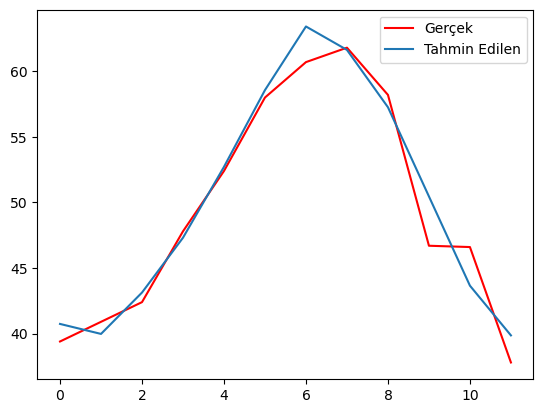

In [130]:
#ifadesi, gerçek değerleri kırmızı renkte bir çizgi grafiği üzerinde gösterir ve grafiğe bir etiket (Gerçek) ekler.
pyplot.plot(y_true, label='Gerçek', color='r')

# tahmin edilen değerleri grafiğe ekler ve bunları varsayılan olarak mavi renkte bir çizgi grafiği ile gösterir. 
#Grafiğe bir etiket (Tahmin Edilen) de eklenir.
pyplot.plot(y_pred, label='Tahmin Edilen')

#grafiğe eklenen etiketleri gösterir
pyplot.legend()
pyplot.show()

# Kaynaklar

https://github.com/cobanov/time-series-analysis-prophet-youtube

https://github.com/jbrownlee/Datasets/
